# 1.Load your zillow dataset.

In [24]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import explore
import wrangle as w
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression
from math import sqrt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import explore as e
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

# Acquire data

In [25]:
df = w.get_zillow_data()
df

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county,tax_rate,price_per_sqft,age
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,LA,0.023417,81.592348,12.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,LA,0.012085,523.314815,6.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,LA,0.012253,311.391430,91.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,LA,0.017192,4.440000,45.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,LA,0.036874,40.467836,44.0
...,...,...,...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,LA,0.032854,96.548571,2.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,Orange,0.014046,424.737401,2.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,Orange,0.011648,171.429805,3.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,Orange,0.012496,214.971125,2.0


# Prepare data

In [26]:
train, validate, test, train_scaled, validate_scaled, test_scaled = e.zillow_prepared(df)
train.describe()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,tax_rate,price_per_sqft,age
count,1.214718e+06,1.214718e+06,1.214718e+06,1.214718e+06,1.214718e+06,1.214718e+06,1.214718e+06,1.214718e+06,1.214718e+06
mean,3.283025e+00,2.187977e+00,1.797768e+03,3.963180e+05,1.960722e+03,4.844790e+03,1.287139e-02,2.221708e+02,5.627804e+01
std,8.918959e-01,8.624930e-01,7.599109e+02,2.933902e+05,2.171821e+01,3.372512e+03,1.987959e-03,1.339147e+02,2.171821e+01
min,0.000000e+00,0.000000e+00,2.000000e+01,5.490000e+02,1.865000e+03,6.340000e+00,4.345669e-03,2.016225e+00,1.000000e+00
25%,3.000000e+00,2.000000e+00,1.260000e+03,1.930692e+05,1.949000e+03,2.566823e+03,1.174083e-02,1.284174e+02,4.200000e+01
50%,3.000000e+00,2.000000e+00,1.615000e+03,3.263185e+05,1.958000e+03,4.059190e+03,1.238818e-02,2.019985e+02,5.900000e+01
75%,4.000000e+00,3.000000e+00,2.162000e+03,5.170052e+05,1.975000e+03,6.174760e+03,1.346824e-02,2.943400e+02,6.800000e+01
max,7.000000e+00,6.500000e+00,5.964000e+03,1.887497e+06,2.016000e+03,2.092198e+04,2.103304e-02,9.608401e+02,1.520000e+02



# 2.Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

* Here is some sample code to get you started:


* from sklearn.linear_model import LinearRegression

 * assuming X and y are already defined
 * model = LinearRegression().fit(X, y)
 * predictions = model.predict(X)
* Modify and add to the code above as necessary for it to work with the zillow dataset.

In [27]:
# create the model object
X = train_scaled[['area']]
y = train_scaled[['taxvalue']]
model = LinearRegression().fit(X, y)

In [28]:
# make predictions
predictions = model.predict(X)


# 3.Plot the residuals for the linear regression model that you made.

In [38]:
# baseline prediction
baseline = train_scaled.taxvalue.mean()




AttributeError: 'DataFrame' object has no attribute 'yhat'

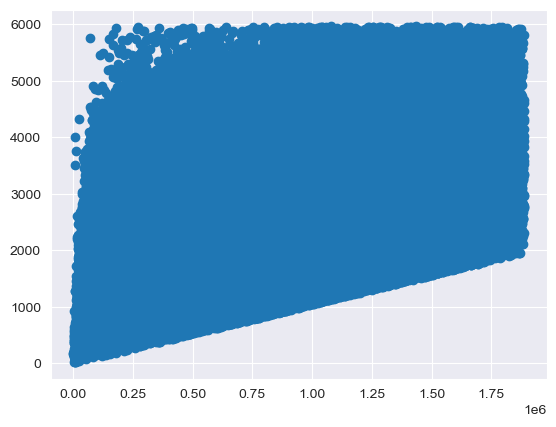

In [39]:
# visualize the line of best fit from OLS linear model

#scatter is my actuals
plt.scatter(train.taxvalue, train.area)

#lineplot is my regression line
plt.plot(train.taxvalue, train.yhat, color='red', linewidth=2)
plt.axhline(baseline, ls=':', color='red')
plt.xlabel('x = taxvalue')
plt.ylabel('y = area')
plt.title('OLS linear model')
plt.show()





Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

What is the amount of variance explained in your model?

Is your model better than the baseline model?

Create a file named evaluate.py that contains the following functions.

plot_residuals(y, yhat): creates a residual plot
regression_errors(y, yhat): returns the following values:
sum of squared errors (SSE)
explained sum of squares (ESS)
total sum of squares (TSS)
mean squared error (MSE)
root mean squared error (RMSE)
baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false